# PCA

- Using the MNIST dataset

## Imports

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# MNIST from torchvision
from torchvision.datasets import MNIST as mnist

## Torchvision MNIST dataset

In [12]:
# use the same train and test datasets than the AE models
# download the MNIST dataset
train_data = mnist("data", train=True, download=True)
test_data = mnist("data", train=False, download=True)

In [13]:
train_data_array = np.array(train_data.data).reshape((-1,784))
train_target_array = np.array(train_data.targets)
test_data_array = np.array(test_data.data).reshape((-1,784))
test_target_array = np.array(test_data.targets)

In [14]:
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
COLS_PLT = 12

def show_images(images):
    for i, image in enumerate(images):
        plt.subplot(len(images), COLS_PLT, i+1)
        plt.imshow(image.reshape(28, 28))
        plt.axis('off')

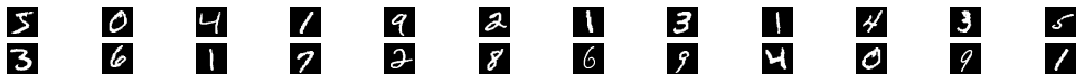

In [15]:
show_images(train_data_array[0:24])

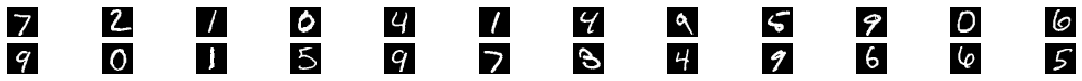

In [16]:
show_images(test_data_array[0:24])

In [17]:
print(train_target_array)
print(test_target_array)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [18]:
train_data_df = pd.DataFrame(train_data_array)
train_target_series = pd.Series(train_target_array, name='digit')
test_data_df = pd.DataFrame(test_data_array)
test_target_series = pd.Series(test_target_array, name='digit')

## PCA

In [19]:
pca = PCA(n_components=3, random_state=6878)
pca.fit(train_data_df)

PCA(n_components=3, random_state=6878)

In [20]:
pc = pca.transform(train_data_df)
pc_test = pca.transform(test_data_df)
pc_test_predicted = pca.inverse_transform(pc_test)
pc_test_predicted_df = pd.DataFrame(pc_test_predicted)

In [21]:
# save model
from joblib import dump, load
dump(pca, filename='models/pca.pkl', compress=3)

['models/pca.pkl']

In [22]:
# to load, use joblib.load()
# pca2 = load('pca.pkl')
# print(pca2.singular_values_)

### Train data analysis

In [23]:
print(f'Variance explained: {round(sum(pca.explained_variance_ratio_)*100,2)}%')
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

Variance explained: 22.97%
[0.09704664 0.07095924 0.06169089]
[141291.00226873 120817.18858699 112650.92322158]


In [24]:
pca_df = pd.DataFrame(data=pc)
pca_df.index = train_data_df.index
pca_df = pd.concat([pca_df, train_target_series.apply(int)], axis=1)

In [25]:
display(pca_df)
pca_df.info()

,0,1,2,digit
0,123.932574,-312.673509,-24.526595,5
1,1011.718479,-294.857766,596.343651,0
2,-51.849490,392.174833,-188.516293,4
3,-799.126996,-607.197439,273.647195,1
4,-382.754958,730.542448,16.363120,9
...,...,...,...,...
59995,-99.621729,-293.473577,135.939686,8
59996,152.757895,-687.897891,-88.932813,3
59997,-178.053598,160.078991,-257.617384,5
59998,130.605957,-5.592360,513.864125,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60000 non-null  float64
 1   1       60000 non-null  float64
 2   2       60000 non-null  float64
 3   digit   60000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 1.8 MB


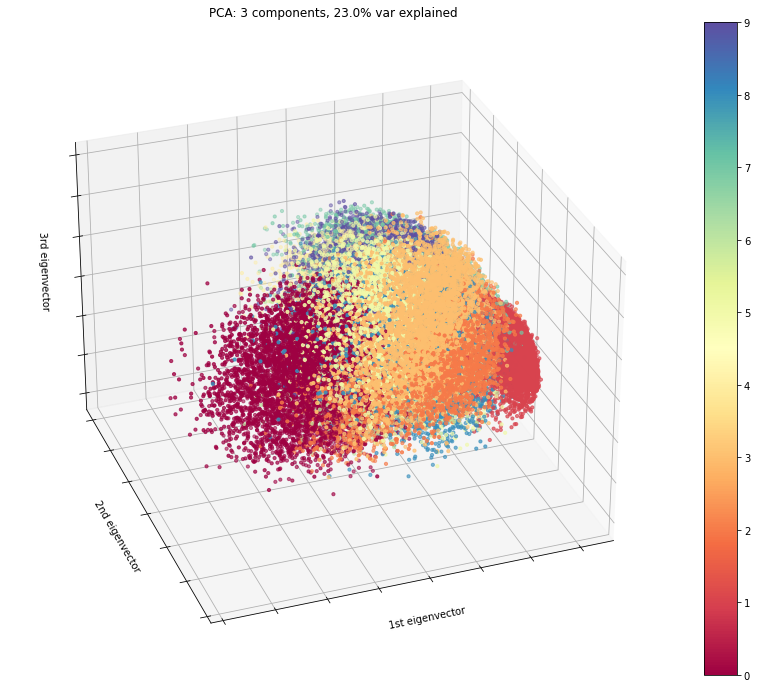

In [26]:
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
plot = ax.scatter(
       pca_df[0],
       pca_df[1],
       pca_df[2],
       c=pca_df['digit'],
       cmap='Spectral',
       edgecolor=None,
       s=10,
)
ax.set_title(f"PCA: {pca.n_components} components, {round(sum(pca.explained_variance_ratio_)*100,1)}% var explained")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])
fig.colorbar(plot)
plt.savefig("imgs/pca.png")
plt.show()

### Test data analysis

In [27]:
pca_df = pd.DataFrame(data=pc_test)
pca_df.index = test_data_df.index
pca_df = pd.concat([pca_df, test_target_series.apply(int)], axis=1)

In [28]:
display(pca_df)
pca_df.info()

,0,1,2,digit
0,-332.271161,747.797693,-42.846028,7
1,20.696767,-955.589126,-152.709270,2
2,-946.026720,-430.843284,66.175194,1
3,1233.907051,112.938312,253.814271,0
4,189.278275,714.581629,-291.913283,4
...,...,...,...,...
9995,302.242130,-547.247108,-37.187942,2
9996,575.699065,-692.074613,-820.009808,3
9997,-270.187754,596.870507,355.107926,4
9998,-314.027340,-108.605082,642.839961,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   digit   10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


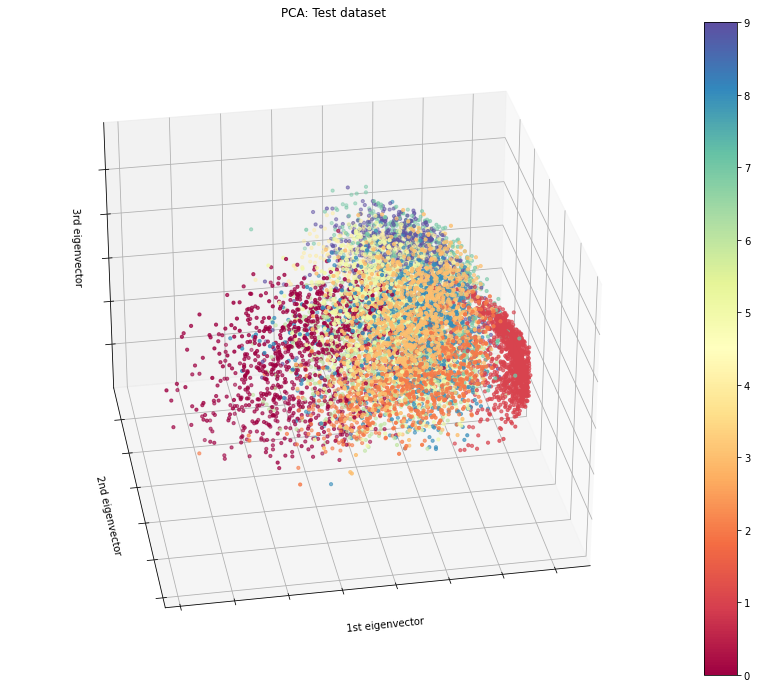

In [29]:
# visualization
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=100)
plot = ax.scatter(
       pca_df[0],
       pca_df[1],
       pca_df[2],
       c=pca_df['digit'],
       cmap='Spectral',
       edgecolor=None,
       s=10,
)
ax.set_title(f"PCA: Test dataset")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])
fig.colorbar(plot)
plt.savefig("imgs/pca_test.png")
plt.show()

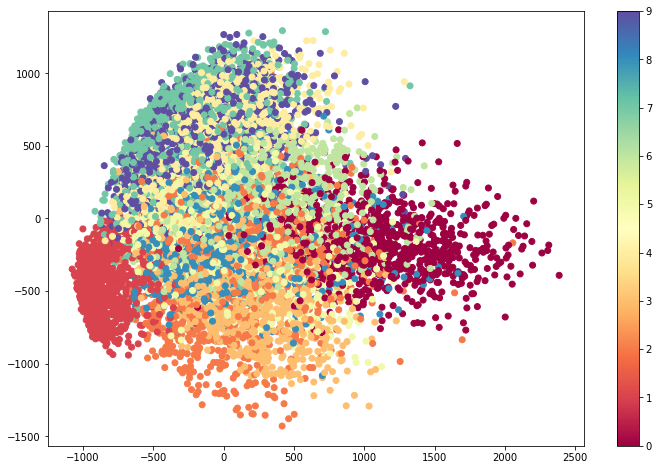

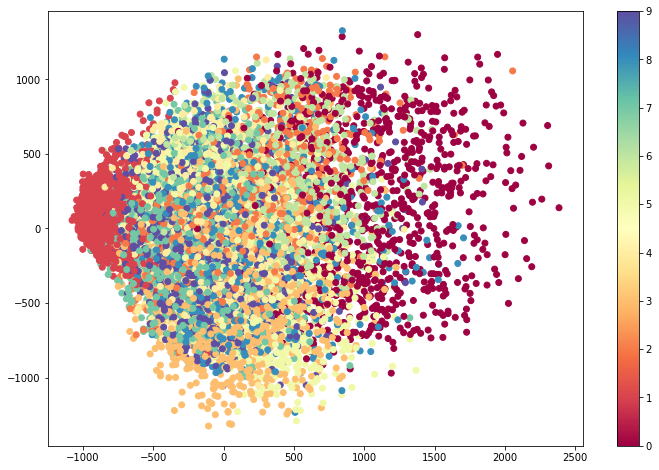

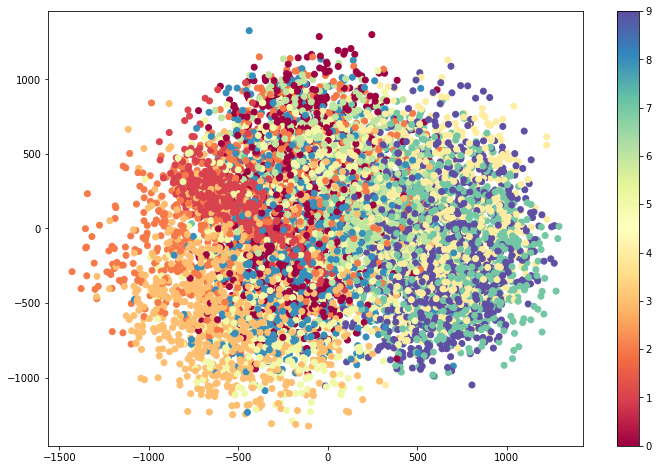

In [30]:
# 2D plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'Spectral'
plt.scatter(pca_df[0], pca_df[1], c=pca_df['digit'])
plt.colorbar()
plt.show()
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'Spectral'
plt.scatter(pca_df[0], pca_df[2], c=pca_df['digit'])
plt.colorbar()
plt.show()
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'Spectral'
plt.scatter(pca_df[1], pca_df[2], c=pca_df['digit'])
plt.colorbar()
plt.show()

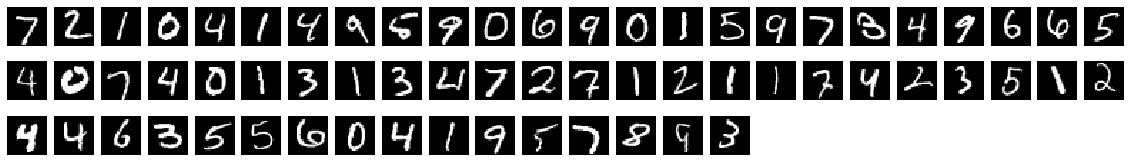

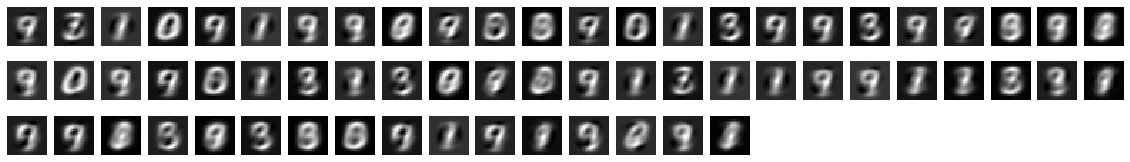

In [31]:
plt.rcParams['figure.figsize'] = (20, 64)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
EXAMPLES_PLT = 64
COLS_PLT = 24

def show_images(images):
    for i, image in enumerate(images):
        plt.subplot(len(images), COLS_PLT, i+1)
        plt.imshow(image)
        plt.axis('off')

show_images(test_data_df[0:EXAMPLES_PLT].values.reshape(-1,28,28))
plt.show()
show_images(pc_test_predicted_df[0:EXAMPLES_PLT].values.reshape(-1,28,28))
plt.show()